# séries temporais aplicadas em MMM

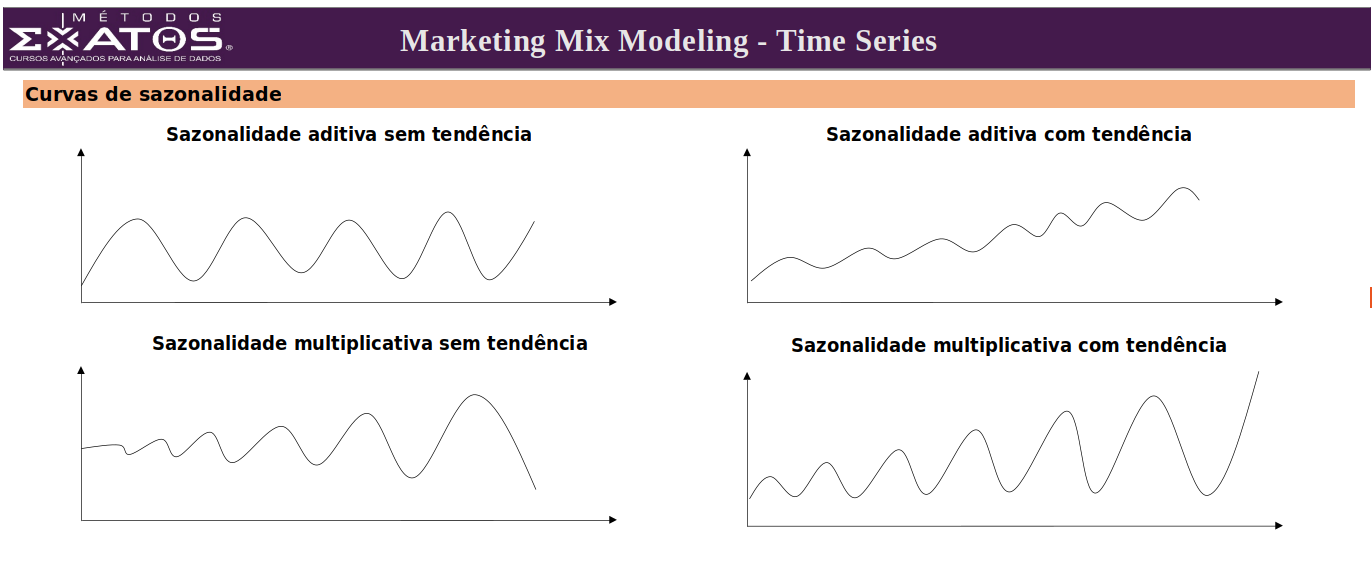

## Justificar algum desses modelos

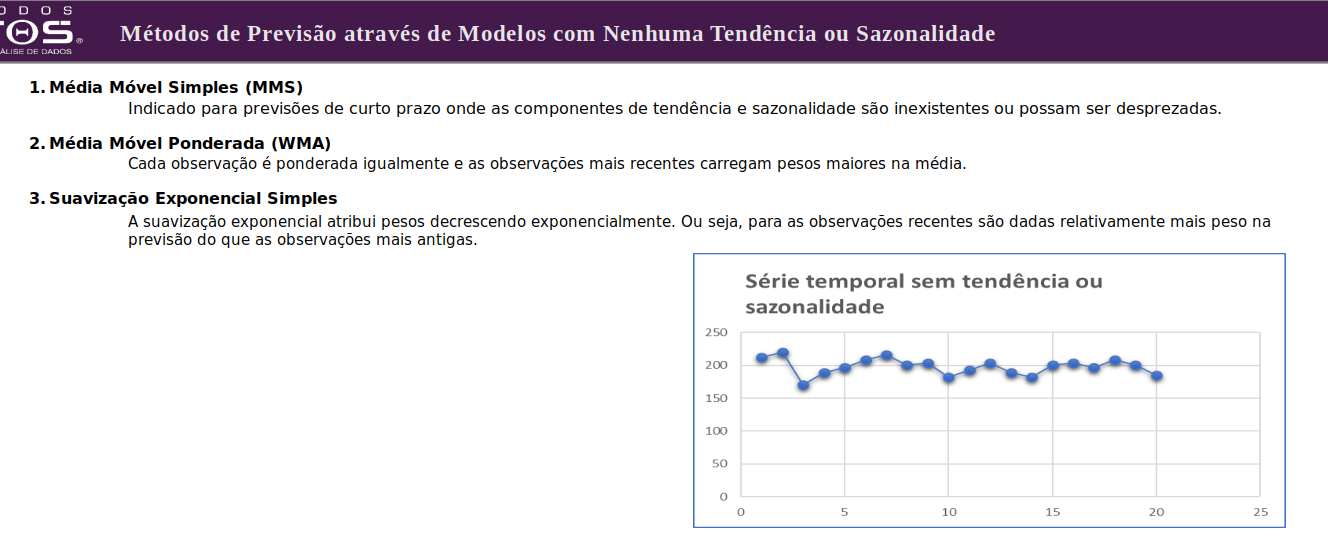



1) trabalhar com indices, investimentos e resultados. 

ROI = retorno/investimento => leads/valor investido => taxa média do retorno


investigação sobre a taxa de retorno, sobre o ROI

para o próximo mês. ROI de 15%, calcular com o modelo de regressão. 



##### - produto novo ou empresa nova

sazonalidade multiplactiva com tendência => sazonalidade multiplicativa ou aditiva com tendência de subida


##### - produto de commodity, cesta básica, marca anos no mercado, ou ovos de páscoa
série mais estável

sazonalidade sem tendência. 
regressões 

porém, nos dados em dezembro de 2016 houve dados atipicos, temos que investigar. Verificar se há erros, há técnicas para minimizar os erros.

2) substituir o valor dos leads de dezembro de 2016 com os valores das médias 



arrumar as bases de dados antes de usar os métodos, resultados atipicos par adar referência e melhorar no modelo. 

Se fosse a previsão para dezembro de 2017 valeria a pena deixar o valor de dez/2016, mas como queremos prever julho e agosto de 2017. Melhor suavizar o valor de dez/2016 para não interferir na previsão. 

#### suavizar as anomalias, ou outliers => dados atípicos ou dados discrepantes. 

Outliers tanto para mais tanto para menos. 

comportamento médio de cada um dos sites. 

Não mexer na base original. 

Ajuste do Outliers. média antes do período do outliers


##### Ou fazer uma média coletando o valor antes e depois. 6 valores antes e depois do outliers ✅


https://emojiterra.com/pt/marca-de-verificacao/


média meio a meio, para ponderar as duas frentes, antes e depois. Eferência melhor.
Fatos que aconteceram antes e fatos que aconteceram depois.

A ideia é calcular a mediana. Percebendo que as oscilações são muito acentuadas. 


In [1]:
import pandas as pd

df_Base_fusca = pd.read_excel("08_MMM_TimeSeries_base.xlsx", sheet_name= "Base Fusca", skiprows=4, usecols=  ['Month', 'Facebook', 'Programática',
       'Youtube', 'UOL', 'Outros', 'Facebook.1', 'Programática.1', 'Youtube.1',
       'UOL.1', 'Outros.1'])
df_Base_fusca.tail()

,Month,Facebook,Programática,Youtube,UOL,Outros,Facebook.1,Programática.1,Youtube.1,UOL.1,Outros.1
13,2017-02-01,208994.980000,491499.464400,3222.930300,56715.758900,166924.346400,2681.60,100.56,33.52,30.5032,505.8168
14,2017-03-01,328435.620000,618041.868600,33521.000317,45935.497133,58349.993950,1504.95,57.15,38.10,15.6210,289.1790
15,2017-04-01,53297.100000,254391.701100,23625.100275,34653.107225,80334.221400,2141.16,76.47,101.96,24.2155,205.1945
16,2017-05-02,79562.492043,217749.978223,19890.623011,30359.371964,71187.492881,2831.24,76.52,76.52,32.1384,809.5816
17,2017-06-03,74537.492546,209374.979060,38315.621168,33709.371629,62812.493718,1889.16,179.92,112.45,18.4418,49.0282


In [2]:
# renomear colunas
df_Base_fusca.columns= [ 'Month', 'Facebook_investimento', 'Programática_investimento', 'Youtube_investimento', 'UOL_investimento', 'Outros_investimento', 'Facebook_leads', 'Programática_leads', 'Youtube_leads',
       'UOL_leads', 'Outros_leads']

In [3]:
df_Base_fusca_altera = df_Base_fusca.copy() 

In [4]:
df_Base_fusca_altera

,Month,Facebook_investimento,Programática_investimento,Youtube_investimento,UOL_investimento,Outros_investimento,Facebook_leads,Programática_leads,Youtube_leads,UOL_leads,Outros_leads
0,2016-01-01,60473.873061,143334.307700,29416.657409,22211.303080,15005.948750,1760.99,182.96,114.35,19.8969,208.8031
1,2016-02-01,52028.197184,122356.197500,12345.368987,14119.088829,30011.897500,1908.95,209.20,26.15,25.1040,445.5960
2,2016-03-01,228511.969582,377200.055000,82119.441529,49562.695139,17005.948750,1791.33,50.46,100.92,23.4639,556.8261
3,2016-04-01,81396.278302,347615.576700,107648.585849,63146.828750,81791.900400,2468.20,282.08,35.26,32.0866,708.3734
4,2016-05-01,145988.500300,330060.957200,10578.876833,52894.384167,95209.891500,2874.40,251.51,35.93,31.6184,399.5416
5,2016-06-01,189697.708860,391937.415000,65453.548305,50559.926535,86226.231300,3871.92,297.84,99.28,41.2012,653.7588
6,2016-07-01,142408.233800,374758.510000,96844.813750,58087.569050,77417.893400,1508.00,40.20,40.20,16.6830,404.9170
7,2016-08-01,117147.529820,355391.382600,38171.667020,61864.425860,85557.184700,1965.60,176.40,25.20,20.9160,331.8840
8,2016-09-01,190300.119460,440363.912800,9436.369560,51900.032580,94363.695600,1593.90,136.62,22.77,17.0775,506.6325
9,2016-10-01,113164.169100,351404.525100,25167.000650,43677.398600,62187.796550,2053.28,125.20,125.20,21.0336,179.2864


In [5]:
import numpy as np
import pandas as pd
from scipy import stats

# Calcular z-score
z_scores = stats.zscore(df_Base_fusca_altera['Facebook_leads'])

# Encontrar índices de outliers
outliers = df_Base_fusca_altera[np.abs(z_scores) > 1.5]

print("Outliers encontrados em Facebook_leads:")
display(outliers)

Outliers encontrados em Facebook_leads:


,Month,Facebook_investimento,Programática_investimento,Youtube_investimento,UOL_investimento,Outros_investimento,Facebook_leads,Programática_leads,Youtube_leads,UOL_leads,Outros_leads
5,2016-06-01,189697.70886,391937.4150,65453.548305,50559.926535,86226.2313,3871.92,297.84,99.28,41.2012,653.7588
11,2016-12-01,55284.24552,194153.0051,23528.711635,19908.909845,36198.0179,900.00,17.00,17.00,5.0000,4.0000


In [6]:
# Calcular z-score
z_scores = stats.zscore(df_Base_fusca_altera['Programática_leads'])

# Encontrar índices de outliers
outliers = df_Base_fusca_altera[np.abs(z_scores) > 1.5]

print("Outliers encontrados em Programática_leads:")
display(outliers)

Outliers encontrados em Programática_leads:


,Month,Facebook_investimento,Programática_investimento,Youtube_investimento,UOL_investimento,Outros_investimento,Facebook_leads,Programática_leads,Youtube_leads,UOL_leads,Outros_leads
3,2016-04-01,81396.278302,347615.5767,107648.585849,63146.828750,81791.9004,2468.20,282.08,35.26,32.0866,708.3734
5,2016-06-01,189697.708860,391937.4150,65453.548305,50559.926535,86226.2313,3871.92,297.84,99.28,41.2012,653.7588


In [7]:
# Calcular média e desvio padrão
mean = df_Base_fusca_altera['Youtube_leads'].mean()
std = df_Base_fusca_altera['Youtube_leads'].std()

# Definir limites (3 desvios padrão da média)
limite_inferior = mean - 9000000 * std
limite_superior = mean + 9000000 * std

# Detectar outliers
outliers = df_Base_fusca_altera[(df_Base_fusca_altera['Youtube_leads'] < limite_inferior) | (df_Base_fusca_altera['Youtube_leads'] > limite_superior)]

print("Média:", mean)
print("Desvio padrão:", std)
print("Outliers encontrados:")
display(outliers)

Média: 61.84833333333333
Desvio padrão: 38.365842383097835
Outliers encontrados:


,Month,Facebook_investimento,Programática_investimento,Youtube_investimento,UOL_investimento,Outros_investimento,Facebook_leads,Programática_leads,Youtube_leads,UOL_leads,Outros_leads


In [8]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Calcular Z-score
df_Base_fusca_altera['z_score'] = zscore(df_Base_fusca_altera['Youtube_leads'])

# Detectar outliers (Z-score > 3 ou < -3)
outliers = df_Base_fusca_altera[(df_Base_fusca_altera['z_score'] > 1.5) | (df_Base_fusca_altera['z_score'] < -1.5)]

print("\nOutliers encontrados:")
display(outliers)


Outliers encontrados:


,Month,Facebook_investimento,Programática_investimento,Youtube_investimento,UOL_investimento,Outros_investimento,Facebook_leads,Programática_leads,Youtube_leads,UOL_leads,Outros_leads,z_score
9,2016-10-01,113164.1691,351404.5251,25167.00065,43677.3986,62187.79655,2053.28,125.2,125.2,21.0336,179.2864,1.699124


In [9]:
df_Base_fusca_altera.columns

Index(['Month', 'Facebook_investimento', 'Programática_investimento',
       'Youtube_investimento', 'UOL_investimento', 'Outros_investimento',
       'Facebook_leads', 'Programática_leads', 'Youtube_leads', 'UOL_leads',
       'Outros_leads', 'z_score'],
      dtype='object')

# Analise estatística correta - zscore normalizado

O escore Z é uma medida estatística que quantifica a distância entre um ponto de dados e a média de um conjunto de dados.

(valor - média)/desvio padrão



In [10]:
import numpy as np
import pandas as pd
from scipy import stats


lista = ['Facebook_leads', 'Programática_leads', 'Youtube_leads', 'UOL_leads', 'Outros_leads']

datas_coletadas =[]
for col in lista:
    # Calcular z-score
    z_scores = stats.zscore(df_Base_fusca_altera[f'{col}'])
    
    # Encontrar índices de outliers
    outliers = df_Base_fusca_altera[np.abs(z_scores) > 1.3].reset_index(drop=True)
    
    print(f"Outliers encontrados em {col}:")
    if not outliers.empty:
        display(outliers)
        for i, data in enumerate(outliers['Month']):
            print(i, data)
            datas_coletadas.append(data)

Outliers encontrados em Facebook_leads:


,Month,Facebook_investimento,Programática_investimento,Youtube_investimento,UOL_investimento,Outros_investimento,Facebook_leads,Programática_leads,Youtube_leads,UOL_leads,Outros_leads,z_score
0,2016-06-01,189697.70886,391937.4150,65453.548305,50559.926535,86226.2313,3871.92,297.84,99.28,41.2012,653.7588,1.003936
1,2016-12-01,55284.24552,194153.0051,23528.711635,19908.909845,36198.0179,900.00,17.00,17.00,5.0000,4.0000,-1.202855


0 2016-06-01 00:00:00
1 2016-12-01 00:00:00
Outliers encontrados em Programática_leads:


,Month,Facebook_investimento,Programática_investimento,Youtube_investimento,UOL_investimento,Outros_investimento,Facebook_leads,Programática_leads,Youtube_leads,UOL_leads,Outros_leads,z_score
0,2016-04-01,81396.278302,347615.5767,107648.585849,63146.828750,81791.9004,2468.20,282.08,35.26,32.0866,708.3734,-0.713113
1,2016-05-01,145988.500300,330060.9572,10578.876833,52894.384167,95209.8915,2874.40,251.51,35.93,31.6184,399.5416,-0.695143
2,2016-06-01,189697.708860,391937.4150,65453.548305,50559.926535,86226.2313,3871.92,297.84,99.28,41.2012,653.7588,1.003936
3,2016-12-01,55284.245520,194153.0051,23528.711635,19908.909845,36198.0179,900.00,17.00,17.00,5.0000,4.0000,-1.202855


0 2016-04-01 00:00:00
1 2016-05-01 00:00:00
2 2016-06-01 00:00:00
3 2016-12-01 00:00:00
Outliers encontrados em Youtube_leads:


,Month,Facebook_investimento,Programática_investimento,Youtube_investimento,UOL_investimento,Outros_investimento,Facebook_leads,Programática_leads,Youtube_leads,UOL_leads,Outros_leads,z_score
0,2016-01-01,60473.873061,143334.30770,29416.657409,22211.303080,15005.948750,1760.99,182.96,114.35,19.8969,208.8031,1.408122
1,2016-10-01,113164.169100,351404.52510,25167.000650,43677.398600,62187.796550,2053.28,125.20,125.20,21.0336,179.2864,1.699124
2,2017-06-03,74537.492546,209374.97906,38315.621168,33709.371629,62812.493718,1889.16,179.92,112.45,18.4418,49.0282,1.357163


0 2016-01-01 00:00:00
1 2016-10-01 00:00:00
2 2017-06-03 00:00:00
Outliers encontrados em UOL_leads:


,Month,Facebook_investimento,Programática_investimento,Youtube_investimento,UOL_investimento,Outros_investimento,Facebook_leads,Programática_leads,Youtube_leads,UOL_leads,Outros_leads,z_score
0,2016-06-01,189697.70886,391937.4150,65453.548305,50559.926535,86226.2313,3871.92,297.84,99.28,41.2012,653.7588,1.003936
1,2016-12-01,55284.24552,194153.0051,23528.711635,19908.909845,36198.0179,900.00,17.00,17.00,5.0000,4.0000,-1.202855


0 2016-06-01 00:00:00
1 2016-12-01 00:00:00
Outliers encontrados em Outros_leads:


,Month,Facebook_investimento,Programática_investimento,Youtube_investimento,UOL_investimento,Outros_investimento,Facebook_leads,Programática_leads,Youtube_leads,UOL_leads,Outros_leads,z_score
0,2016-04-01,81396.278302,347615.576700,107648.585849,63146.828750,81791.900400,2468.20,282.08,35.26,32.0866,708.3734,-0.713113
1,2016-12-01,55284.245520,194153.005100,23528.711635,19908.909845,36198.017900,900.00,17.00,17.00,5.0000,4.0000,-1.202855
2,2017-05-02,79562.492043,217749.978223,19890.623011,30359.371964,71187.492881,2831.24,76.52,76.52,32.1384,809.5816,0.393502
3,2017-06-03,74537.492546,209374.979060,38315.621168,33709.371629,62812.493718,1889.16,179.92,112.45,18.4418,49.0282,1.357163


0 2016-04-01 00:00:00
1 2016-12-01 00:00:00
2 2017-05-02 00:00:00
3 2017-06-03 00:00:00


In [11]:
from collections import Counter
contagem = Counter(datas_coletadas)
print(contagem)


Counter({Timestamp('2016-12-01 00:00:00'): 4, Timestamp('2016-06-01 00:00:00'): 3, Timestamp('2016-04-01 00:00:00'): 2, Timestamp('2017-06-03 00:00:00'): 2, Timestamp('2016-05-01 00:00:00'): 1, Timestamp('2016-01-01 00:00:00'): 1, Timestamp('2016-10-01 00:00:00'): 1, Timestamp('2017-05-02 00:00:00'): 1})


In [12]:
data_contagem = pd.DataFrame.from_dict(contagem, orient='index', columns=['Frequência'])
data_contagem = data_contagem.sort_values('Frequência', ascending = False)
data_contagem

,Frequência
2016-12-01,4
2016-06-01,3
2016-04-01,2
2017-06-03,2
2016-05-01,1
2016-01-01,1
2016-10-01,1
2017-05-02,1


In [13]:
df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','Facebook_leads'] 

11    900.0
Name: Facebook_leads, dtype: float64

In [14]:

for col in lista:
    # Soma de 13 dias (6 antes, 1 atual, 6 depois), centralizada
    soma_13 = df_Base_fusca_altera[col].rolling(window=13, center=True).sum()
    
    # Subtrai o valor atual para excluir o dia central
    soma_sem_central = soma_13 - df_Base_fusca_altera[col]
    
    # Calcula a média de 12 dias (6 antes + 6 depois, sem o atual)
    df_Base_fusca_altera[f'{col}media_6_antes_6_depois'] = soma_sem_central / 12

In [15]:
df_Base_fusca_altera

,Month,Facebook_investimento,Programática_investimento,Youtube_investimento,UOL_investimento,Outros_investimento,Facebook_leads,Programática_leads,Youtube_leads,UOL_leads,Outros_leads,z_score,Facebook_leadsmedia_6_antes_6_depois,Programática_leadsmedia_6_antes_6_depois,Youtube_leadsmedia_6_antes_6_depois,UOL_leadsmedia_6_antes_6_depois,Outros_leadsmedia_6_antes_6_depois
0,2016-01-01,60473.873061,143334.307700,29416.657409,22211.303080,15005.948750,1760.99,182.96,114.35,19.8969,208.8031,1.408122,NaN,NaN,NaN,NaN,NaN
1,2016-02-01,52028.197184,122356.197500,12345.368987,14119.088829,30011.897500,1908.95,209.20,26.15,25.1040,445.5960,-0.957448,NaN,NaN,NaN,NaN,NaN
2,2016-03-01,228511.969582,377200.055000,82119.441529,49562.695139,17005.948750,1791.33,50.46,100.92,23.4639,556.8261,1.047922,NaN,NaN,NaN,NaN,NaN
3,2016-04-01,81396.278302,347615.576700,107648.585849,63146.828750,81791.900400,2468.20,282.08,35.26,32.0866,708.3734,-0.713113,NaN,NaN,NaN,NaN,NaN
4,2016-05-01,145988.500300,330060.957200,10578.876833,52894.384167,95209.891500,2874.40,251.51,35.93,31.6184,399.5416,-0.695143,NaN,NaN,NaN,NaN,NaN
5,2016-06-01,189697.708860,391937.415000,65453.548305,50559.926535,86226.231300,3871.92,297.84,99.28,41.2012,653.7588,1.003936,NaN,NaN,NaN,NaN,NaN
6,2016-07-01,142408.233800,374758.510000,96844.813750,58087.569050,77417.893400,1508.00,40.20,40.20,16.6830,404.9170,-0.580619,2038.894167,162.230833,59.210000,23.100292,391.731375
7,2016-08-01,117147.529820,355391.382600,38171.667020,61864.425860,85557.184700,1965.60,176.40,25.20,20.9160,331.8840,-0.982927,2077.478333,144.014167,53.724167,23.631400,422.568600
8,2016-09-01,190300.119460,440363.912800,9436.369560,51900.032580,94363.695600,1593.90,136.62,22.77,17.0775,506.6325,-1.048101,2074.786667,134.658333,54.922500,23.161025,394.971475
9,2016-10-01,113164.169100,351404.525100,25167.000650,43677.398600,62187.796550,2053.28,125.20,125.20,21.0336,179.2864,1.699124,2065.657500,137.777500,46.473333,22.893983,392.947683


In [16]:
df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','Facebook_leads'] = df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','Facebook_leadsmedia_6_antes_6_depois'] 
df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','Programática_leads'] = df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','Programática_leadsmedia_6_antes_6_depois'] 
df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','Youtube_leads'] = df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','Youtube_leadsmedia_6_antes_6_depois'] 
df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','UOL_leads'] = df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','UOL_leadsmedia_6_antes_6_depois'] 
df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','Outros_leads'] = df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','Outros_leadsmedia_6_antes_6_depois'] 




# corrigido os dados do dia 12/2016

In [17]:
df_Base_fusca_altera

,Month,Facebook_investimento,Programática_investimento,Youtube_investimento,UOL_investimento,Outros_investimento,Facebook_leads,Programática_leads,Youtube_leads,UOL_leads,Outros_leads,z_score,Facebook_leadsmedia_6_antes_6_depois,Programática_leadsmedia_6_antes_6_depois,Youtube_leadsmedia_6_antes_6_depois,UOL_leadsmedia_6_antes_6_depois,Outros_leadsmedia_6_antes_6_depois
0,2016-01-01,60473.873061,143334.307700,29416.657409,22211.303080,15005.948750,1760.990000,182.960000,114.350,19.896900,208.80310,1.408122,NaN,NaN,NaN,NaN,NaN
1,2016-02-01,52028.197184,122356.197500,12345.368987,14119.088829,30011.897500,1908.950000,209.200000,26.150,25.104000,445.59600,-0.957448,NaN,NaN,NaN,NaN,NaN
2,2016-03-01,228511.969582,377200.055000,82119.441529,49562.695139,17005.948750,1791.330000,50.460000,100.920,23.463900,556.82610,1.047922,NaN,NaN,NaN,NaN,NaN
3,2016-04-01,81396.278302,347615.576700,107648.585849,63146.828750,81791.900400,2468.200000,282.080000,35.260,32.086600,708.37340,-0.713113,NaN,NaN,NaN,NaN,NaN
4,2016-05-01,145988.500300,330060.957200,10578.876833,52894.384167,95209.891500,2874.400000,251.510000,35.930,31.618400,399.54160,-0.695143,NaN,NaN,NaN,NaN,NaN
5,2016-06-01,189697.708860,391937.415000,65453.548305,50559.926535,86226.231300,3871.920000,297.840000,99.280,41.201200,653.75880,1.003936,NaN,NaN,NaN,NaN,NaN
6,2016-07-01,142408.233800,374758.510000,96844.813750,58087.569050,77417.893400,1508.000000,40.200000,40.200,16.683000,404.91700,-0.580619,2038.894167,162.230833,59.210000,23.100292,391.731375
7,2016-08-01,117147.529820,355391.382600,38171.667020,61864.425860,85557.184700,1965.600000,176.400000,25.200,20.916000,331.88400,-0.982927,2077.478333,144.014167,53.724167,23.631400,422.568600
8,2016-09-01,190300.119460,440363.912800,9436.369560,51900.032580,94363.695600,1593.900000,136.620000,22.770,17.077500,506.63250,-1.048101,2074.786667,134.658333,54.922500,23.161025,394.971475
9,2016-10-01,113164.169100,351404.525100,25167.000650,43677.398600,62187.796550,2053.280000,125.200000,125.200,21.033600,179.28640,1.699124,2065.657500,137.777500,46.473333,22.893983,392.947683


In [18]:
df_Base_fusca_altera2= df_Base_fusca_altera[['Month', 'Facebook_investimento', 'Programática_investimento',
       'Youtube_investimento', 'UOL_investimento', 'Outros_investimento',
       'Facebook_leads', 'Programática_leads', 'Youtube_leads', 'UOL_leads',
       'Outros_leads']]

In [19]:
df_Base_fusca_altera2.columns[1:]

Index(['Facebook_investimento', 'Programática_investimento',
       'Youtube_investimento', 'UOL_investimento', 'Outros_investimento',
       'Facebook_leads', 'Programática_leads', 'Youtube_leads', 'UOL_leads',
       'Outros_leads'],
      dtype='object')


comando melt
https://www.hashtagtreinamentos.com/funcao-melt-ciencia-de-dados?origemurl=130273256579&origemads=602232597317&utm_source=google-ads&utm_campaign=15353425825&utm_medium=130273256579&utm_content=602232597317&utm_term=&gad_source=1&gad_campaignid=15353425825&gbraid=0AAAAADLlh88RVrkkb43fzZh05gONjDwVQ&gclid=Cj0KCQjwucDBBhDxARIsANqFdr1ittbTHUBxfVqRl3lTj4MIdo_cqRgQVdPeELBwlhbJhAHxh1crHN4aArwYEALw_wcB

In [20]:

# Derrete o DataFrame mantendo a coluna Month
df_long = df_Base_fusca_altera2.melt(id_vars='Month', var_name='name', value_name='valor')

# Separa a coluna 'name' em nameplate e tipo (investimentos/leads)
df_long[['nameplate', 'tipo']] = df_long['name'].str.split('_', expand=True)

# Remove a coluna antiga
df_long = df_long.drop(columns='name')
df_long


,Month,valor,nameplate,tipo
0,2016-01-01,60473.873061,Facebook,investimento
1,2016-02-01,52028.197184,Facebook,investimento
2,2016-03-01,228511.969582,Facebook,investimento
3,2016-04-01,81396.278302,Facebook,investimento
4,2016-05-01,145988.500300,Facebook,investimento
...,...,...,...,...
175,2017-02-01,505.816800,Outros,leads
176,2017-03-01,289.179000,Outros,leads
177,2017-04-01,205.194500,Outros,leads
178,2017-05-02,809.581600,Outros,leads


In [21]:
# Pivot para ter colunas separadas de investimentos e leads
df_pivot = df_long.pivot_table(
    index=['Month', 'nameplate'],
    columns='tipo',
    values='valor',
    aggfunc='first'  # ou 'sum', se quiser agregar
).reset_index()
df_pivot

tipo,Month,nameplate,investimento,leads
0,2016-01-01,Facebook,60473.873061,1760.9900
1,2016-01-01,Outros,15005.948750,208.8031
2,2016-01-01,Programática,143334.307700,182.9600
3,2016-01-01,UOL,22211.303080,19.8969
4,2016-01-01,Youtube,29416.657409,114.3500
...,...,...,...,...
85,2017-06-03,Facebook,74537.492546,1889.1600
86,2017-06-03,Outros,62812.493718,49.0282
87,2017-06-03,Programática,209374.979060,179.9200
88,2017-06-03,UOL,33709.371629,18.4418


# usar o df_final

In [22]:
 #Resultado final  => coreto 
df_final = df_pivot[['Month', 'nameplate', 'investimento', 'leads']]
df_final

tipo,Month,nameplate,investimento,leads
0,2016-01-01,Facebook,60473.873061,1760.9900
1,2016-01-01,Outros,15005.948750,208.8031
2,2016-01-01,Programática,143334.307700,182.9600
3,2016-01-01,UOL,22211.303080,19.8969
4,2016-01-01,Youtube,29416.657409,114.3500
...,...,...,...,...
85,2017-06-03,Facebook,74537.492546,1889.1600
86,2017-06-03,Outros,62812.493718,49.0282
87,2017-06-03,Programática,209374.979060,179.9200
88,2017-06-03,UOL,33709.371629,18.4418


In [23]:
# Cria listas vazias para armazenar os resultados
nameplates = []
investimentos = []
leads = []

# Percorre todas as colunas
for col in df_Base_fusca_altera2.columns[1:]:
    base = col.split('_')[0]  # Parte antes do underline, ex: Google
    tipo = col.split('_')[1]  # Parte depois do underline, ex: investimentos ou leads
    
    for val in df_Base_fusca_altera2[col]:
        nameplates.append(base)
        if tipo == 'investimento':
            investimentos.append(val)
            leads.append(None)
        elif tipo == 'leads':
            leads.append(val)
            investimentos.append(None)

# Monta novo DataFrame
novo_df = pd.DataFrame({
    'nameplate': nameplates,
    'investimento': investimentos,
    'leads': leads
})
novo_df.tail()

,nameplate,investimento,leads
175,Outros,NaN,505.8168
176,Outros,NaN,289.1790
177,Outros,NaN,205.1945
178,Outros,NaN,809.5816
179,Outros,NaN,49.0282


In [24]:
df_final.tail()

tipo,Month,nameplate,investimento,leads
85,2017-06-03,Facebook,74537.492546,1889.1600
86,2017-06-03,Outros,62812.493718,49.0282
87,2017-06-03,Programática,209374.979060,179.9200
88,2017-06-03,UOL,33709.371629,18.4418
89,2017-06-03,Youtube,38315.621168,112.4500


# calcular de forma correta o ROI

In [25]:
df_group_geral = df_final.groupby(['Month']).agg({'investimento':'sum', 'leads':'sum'}).reset_index()
df_group_geral['ROI(%)'] = (df_group_geral['leads']/df_group_geral['investimento'])*100
df_group_geral 

tipo,Month,investimento,leads,ROI(%)
0,2016-01-01,2.704421e+05,2287.000000,0.845652
1,2016-02-01,2.308607e+05,2615.000000,1.132717
2,2016-03-01,7.544001e+05,2523.000000,0.334438
3,2016-04-01,6.815992e+05,3526.000000,0.517313
4,2016-05-01,6.347326e+05,3593.000000,0.566065
5,2016-06-01,7.838748e+05,4964.000000,0.633264
6,2016-07-01,7.495170e+05,2010.000000,0.268173
7,2016-08-01,6.581322e+05,2520.000000,0.382902
8,2016-09-01,7.863641e+05,2277.000000,0.289561
9,2016-10-01,5.956009e+05,2504.000000,0.420416


In [26]:

df_group = df_final.groupby(['Month','nameplate']).agg({'investimento':'sum', 'leads':'sum'}).reset_index()
df_group.tail()


tipo,Month,nameplate,investimento,leads
85,2017-06-03,Facebook,74537.492546,1889.1600
86,2017-06-03,Outros,62812.493718,49.0282
87,2017-06-03,Programática,209374.979060,179.9200
88,2017-06-03,UOL,33709.371629,18.4418
89,2017-06-03,Youtube,38315.621168,112.4500


In [27]:
lista_coluna_grupo = list(df_group['nameplate'].unique())
lista_coluna_grupo

['Facebook', 'Outros', 'Programática', 'UOL', 'Youtube']

Facebook


tipo,Month,nameplate,investimento,leads,ROI(%)
0,2016-01-01,Facebook,60473.873061,1760.990000,2.911985
1,2016-02-01,Facebook,52028.197184,1908.950000,3.669068
2,2016-03-01,Facebook,228511.969582,1791.330000,0.783911
3,2016-04-01,Facebook,81396.278302,2468.200000,3.032325
4,2016-05-01,Facebook,145988.500300,2874.400000,1.968922
5,2016-06-01,Facebook,189697.708860,3871.920000,2.041100
6,2016-07-01,Facebook,142408.233800,1508.000000,1.058928
7,2016-08-01,Facebook,117147.529820,1965.600000,1.677884
8,2016-09-01,Facebook,190300.119460,1593.900000,0.837572
9,2016-10-01,Facebook,113164.169100,2053.280000,1.814426


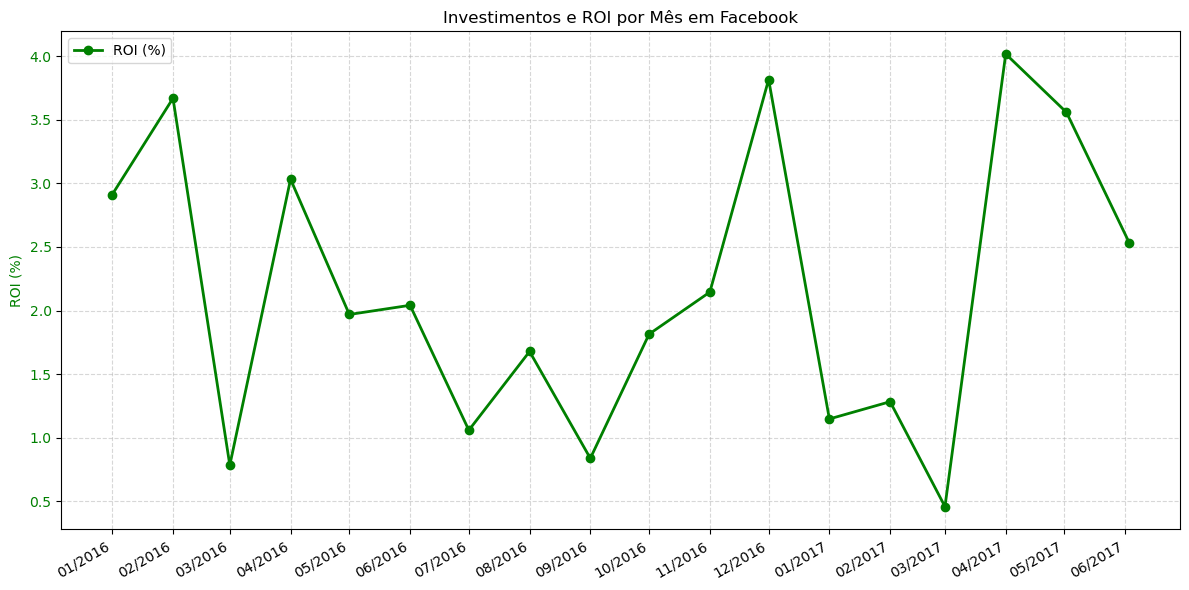

Outros


tipo,Month,nameplate,investimento,leads,ROI(%)
0,2016-01-01,Outros,15005.948750,208.80310,1.391469
1,2016-02-01,Outros,30011.897500,445.59600,1.484731
2,2016-03-01,Outros,17005.948750,556.82610,3.274302
3,2016-04-01,Outros,81791.900400,708.37340,0.866068
4,2016-05-01,Outros,95209.891500,399.54160,0.419643
5,2016-06-01,Outros,86226.231300,653.75880,0.758190
6,2016-07-01,Outros,77417.893400,404.91700,0.523028
7,2016-08-01,Outros,85557.184700,331.88400,0.387909
8,2016-09-01,Outros,94363.695600,506.63250,0.536893
9,2016-10-01,Outros,62187.796550,179.28640,0.288298


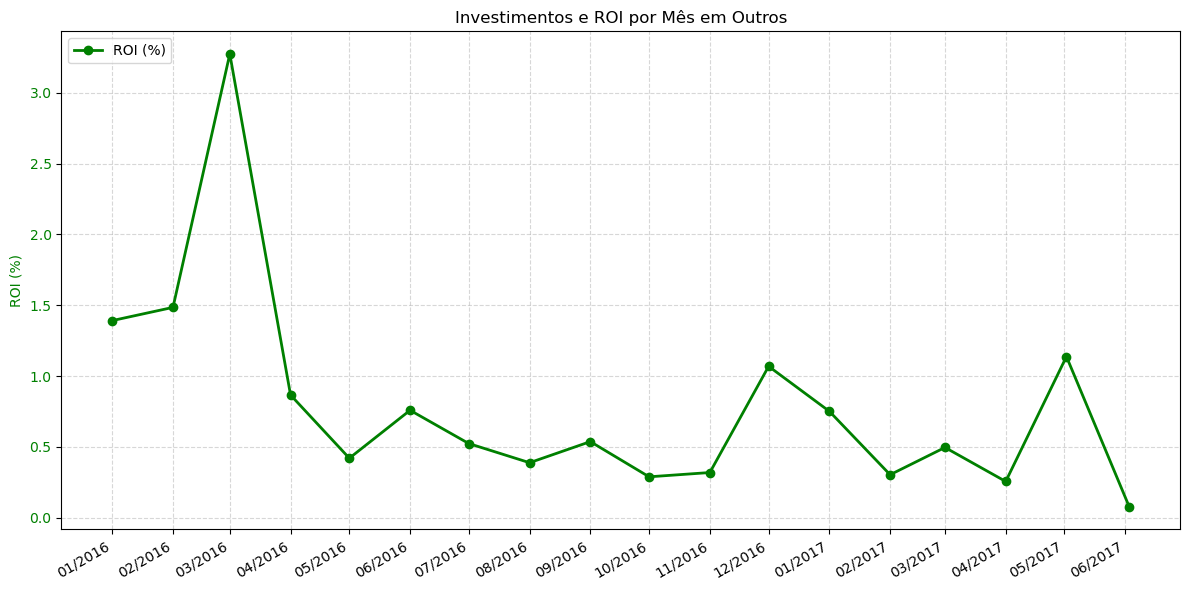

Programática


tipo,Month,nameplate,investimento,leads,ROI(%)
0,2016-01-01,Programática,143334.307700,182.960000,0.127646
1,2016-02-01,Programática,122356.197500,209.200000,0.170976
2,2016-03-01,Programática,377200.055000,50.460000,0.013378
3,2016-04-01,Programática,347615.576700,282.080000,0.081147
4,2016-05-01,Programática,330060.957200,251.510000,0.076201
5,2016-06-01,Programática,391937.415000,297.840000,0.075992
6,2016-07-01,Programática,374758.510000,40.200000,0.010727
7,2016-08-01,Programática,355391.382600,176.400000,0.049635
8,2016-09-01,Programática,440363.912800,136.620000,0.031024
9,2016-10-01,Programática,351404.525100,125.200000,0.035628


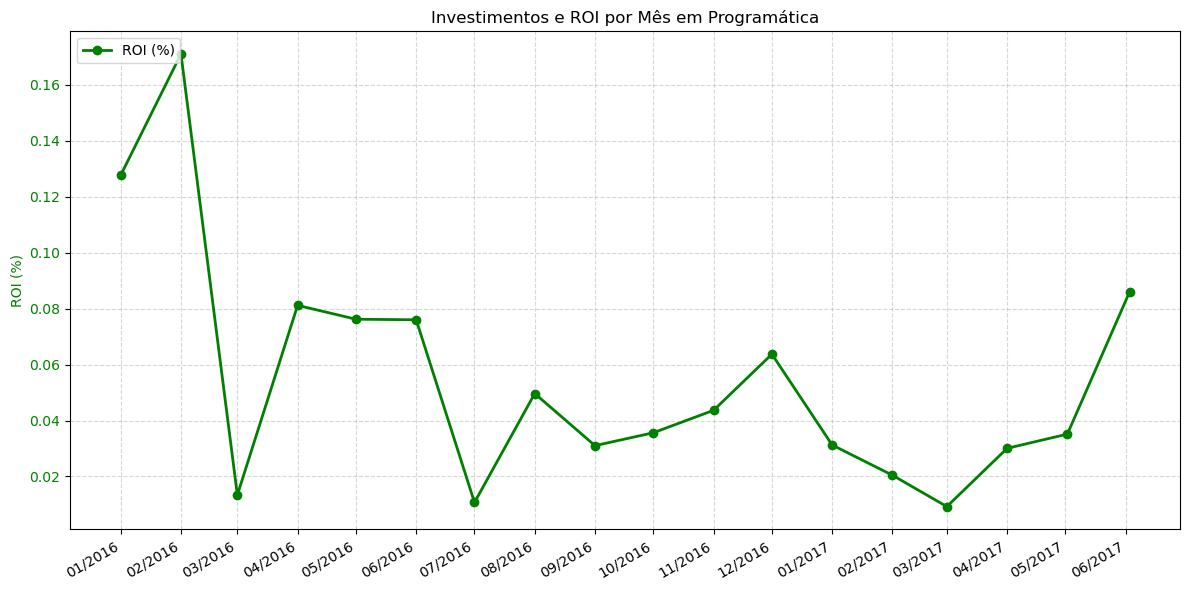

UOL


tipo,Month,nameplate,investimento,leads,ROI(%)
0,2016-01-01,UOL,22211.303080,19.896900,0.089580
1,2016-02-01,UOL,14119.088829,25.104000,0.177802
2,2016-03-01,UOL,49562.695139,23.463900,0.047342
3,2016-04-01,UOL,63146.828750,32.086600,0.050813
4,2016-05-01,UOL,52894.384167,31.618400,0.059776
5,2016-06-01,UOL,50559.926535,41.201200,0.081490
6,2016-07-01,UOL,58087.569050,16.683000,0.028720
7,2016-08-01,UOL,61864.425860,20.916000,0.033809
8,2016-09-01,UOL,51900.032580,17.077500,0.032905
9,2016-10-01,UOL,43677.398600,21.033600,0.048157


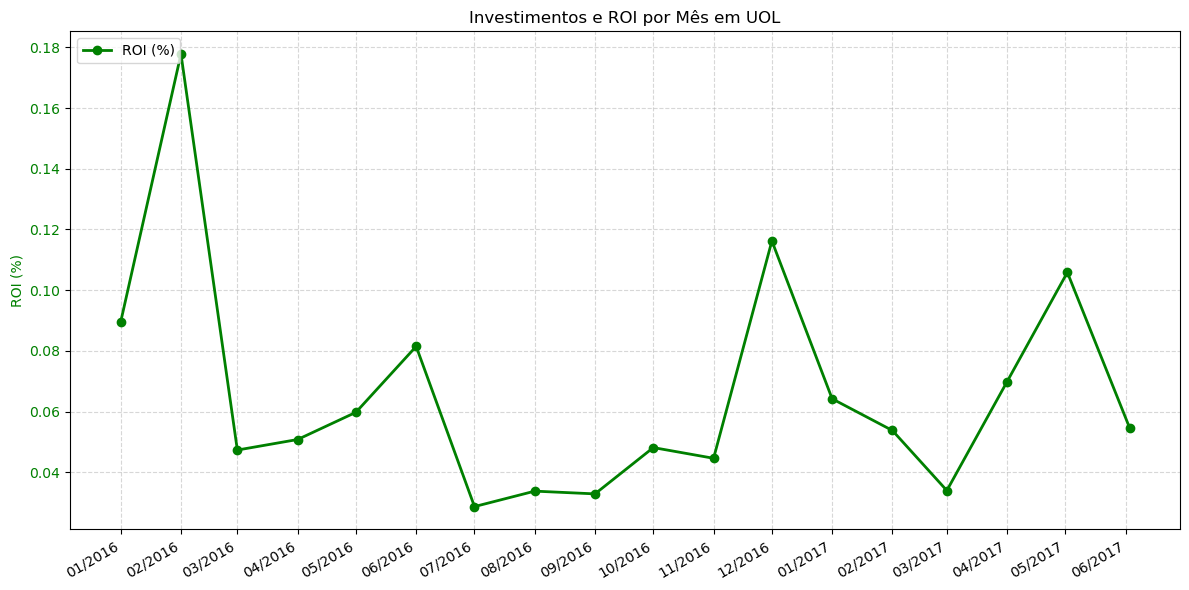

Youtube


tipo,Month,nameplate,investimento,leads,ROI(%)
0,2016-01-01,Youtube,29416.657409,114.350,0.388725
1,2016-02-01,Youtube,12345.368987,26.150,0.211820
2,2016-03-01,Youtube,82119.441529,100.920,0.122894
3,2016-04-01,Youtube,107648.585849,35.260,0.032755
4,2016-05-01,Youtube,10578.876833,35.930,0.339639
5,2016-06-01,Youtube,65453.548305,99.280,0.151680
6,2016-07-01,Youtube,96844.813750,40.200,0.041510
7,2016-08-01,Youtube,38171.667020,25.200,0.066018
8,2016-09-01,Youtube,9436.369560,22.770,0.241300
9,2016-10-01,Youtube,25167.000650,125.200,0.497477


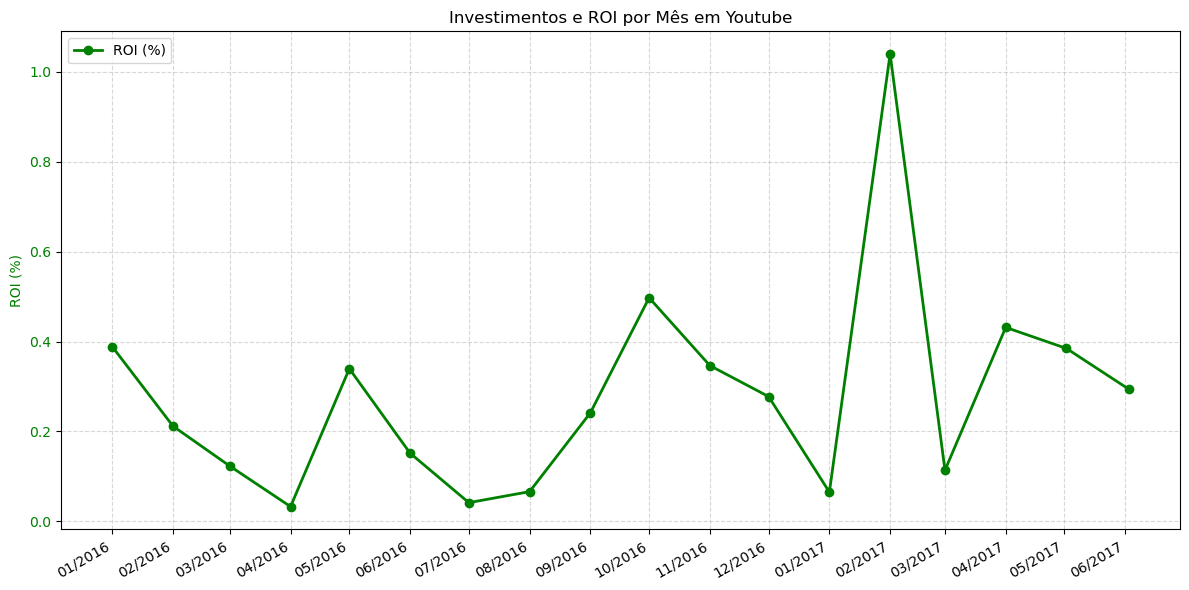

In [28]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt



for col in lista_coluna_grupo:
    df= df_group.loc[df_group['nameplate']== col].reset_index(drop=True)
    df['ROI(%)'] = (df['leads']/df['investimento'])*100
    print(col)
    display(df)
    fig, x = plt.subplots(figsize=(12, 6))

    # Formatando o eixo X
    x.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Mostra todos os meses
    x.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))  # Formato '01/2016'
    
    
    x.plot(df['Month'], df['ROI(%)'], color='green', marker='o', linewidth=2, label='ROI (%)')
    x.set_ylabel('ROI (%)', color='green')
    x.tick_params(axis='y', labelcolor='green')
    
    # Títulos e grid
    plt.title(f'Investimentos e ROI por Mês em {col}')
    fig.autofmt_xdate()
    x.grid(True,  linestyle='--', alpha=0.5)
    
    # Legenda combinada
    lines_1, labels_1 = x.get_legend_handles_labels()
    x.legend(lines_1 , labels_1 , loc='upper left')   
    plt.tight_layout()
    name= col.replace('á','a')
    plt.savefig(f'grafico_roi{name}.png', dpi=300, bbox_inches='tight')
    plt.show()


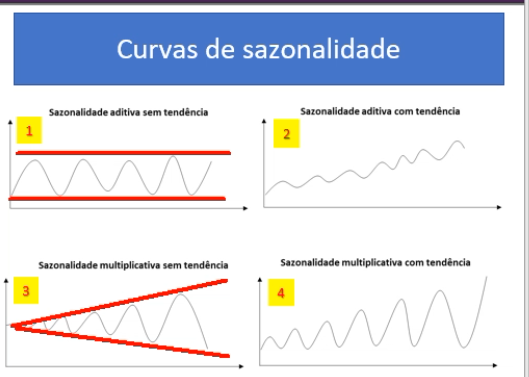

Para achar o modelo adequado. Base curta, difícil ver a sazonalidade


- facebook curva 3 (Modelo multiplicativo – sem tendência)

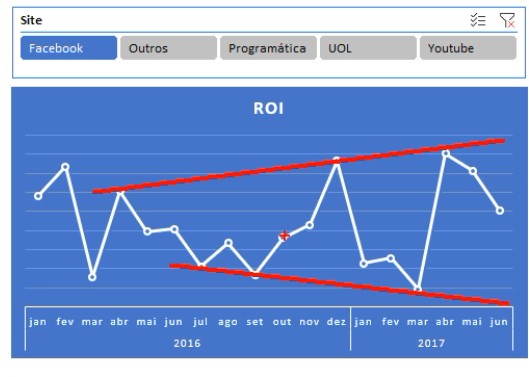


- Programático curva 1 (sazonalidade aditiva sem tendência)

outlier no início

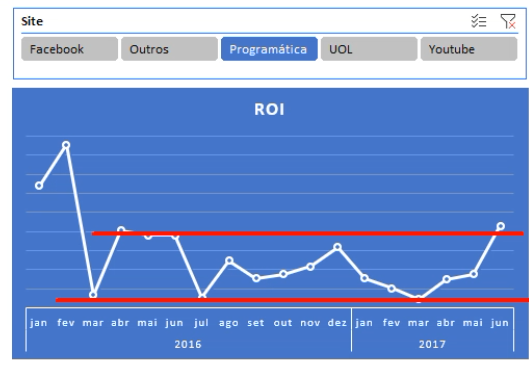


- youtube curva 1 (sazonalidade aditiva sem tendência)

outlier fevereiro de 2017.

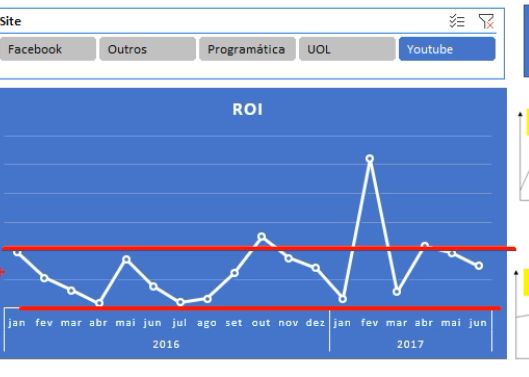


- Uol - ROI - curva 4 sazonalidade multiplicativa com tendência

tirar o outlier inicial, fevereiro de 2016

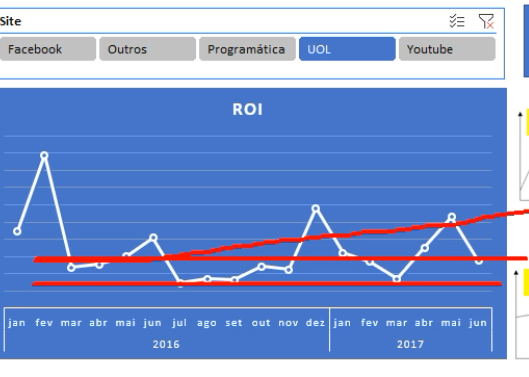


- Outros curva 3 -  sazonalidade multiplicativa - sem tendência

tirar o outlier em fev/2016


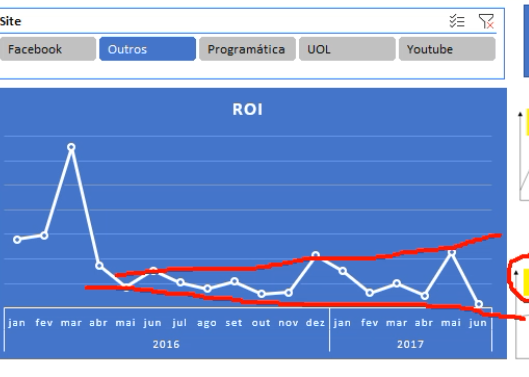


modelos de série temporal sem tendência ou sazonalidade

média móvel simples

média móvel ponderada

suavização exponencial simples



desconsiderar tendência e sazonalidade



### considerar o ROI geral 

# 3.28) Para saber se uma série temporal é aditiva ou multiplicativa, e se tem tendência ou sazonalidade


Tendência (trend)

Sazonalidade (seasonal)

Resíduo (residual)


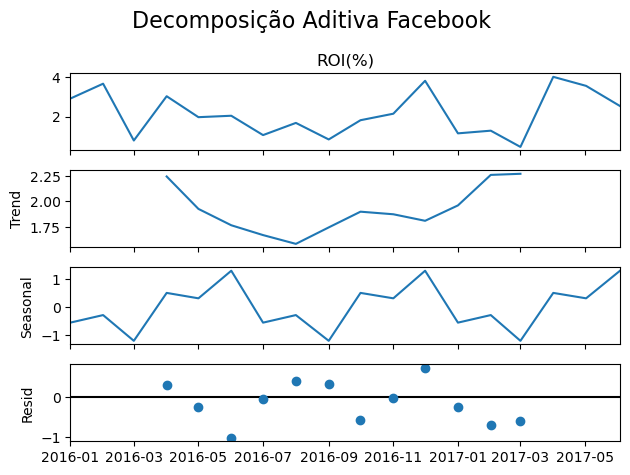

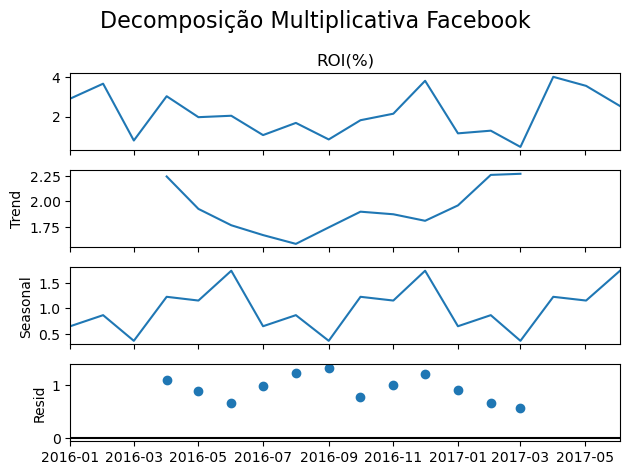

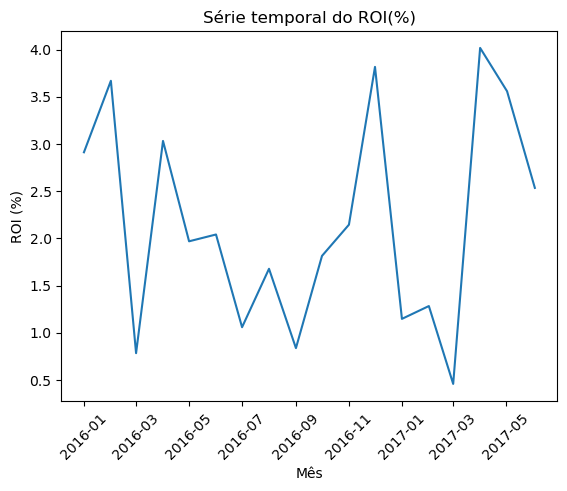

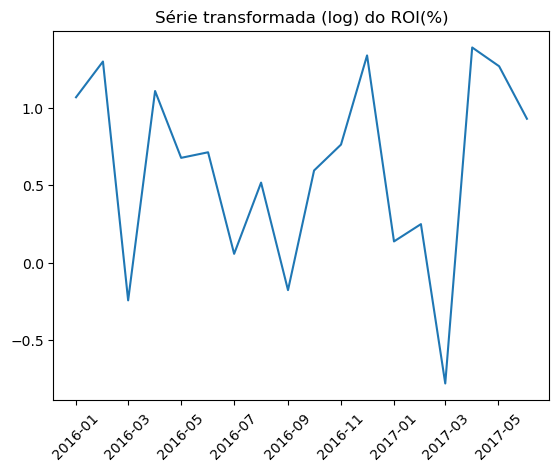

--------------------------------------------------------------------------------


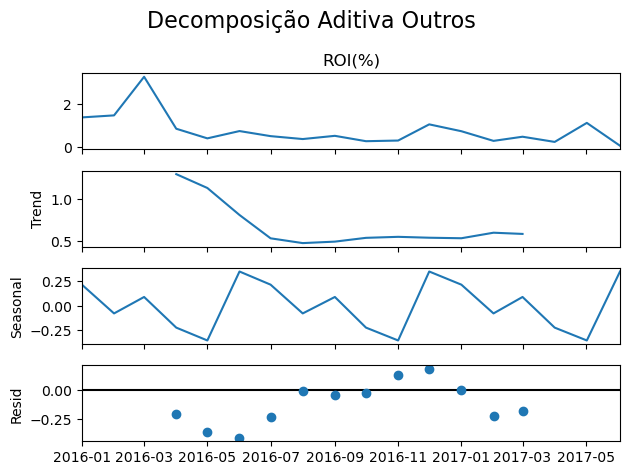

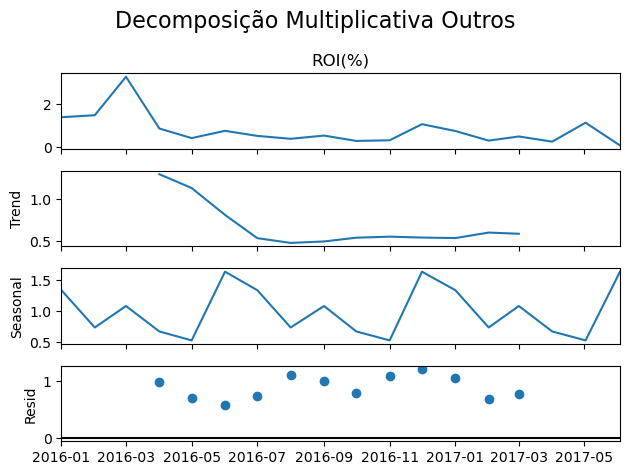

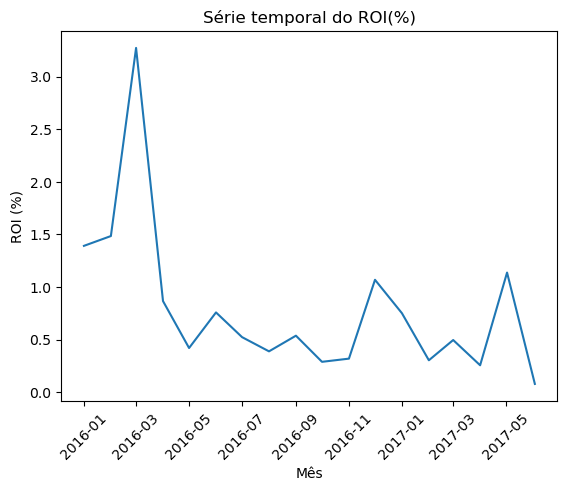

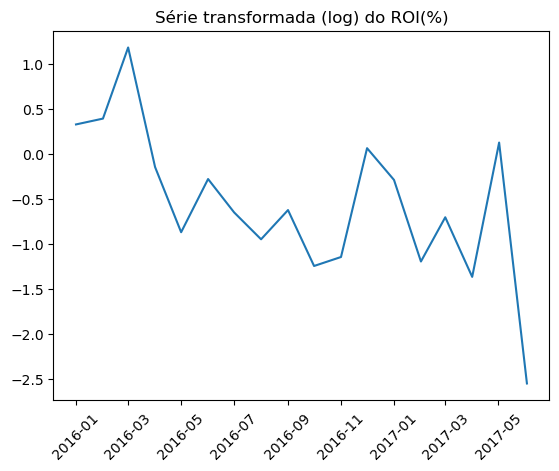

--------------------------------------------------------------------------------


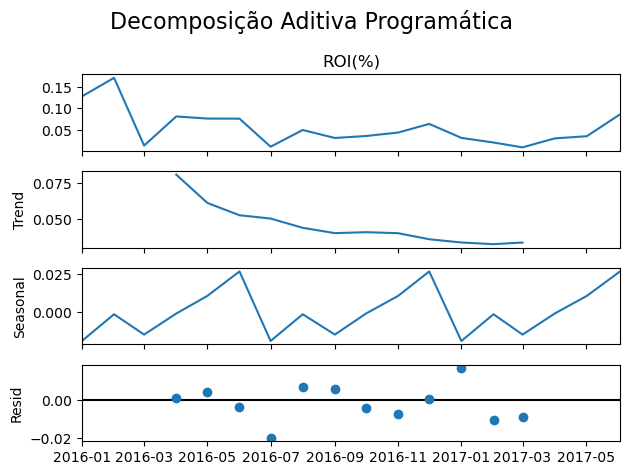

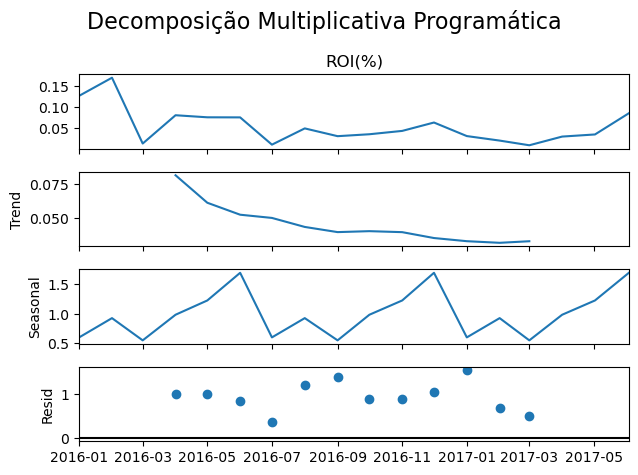

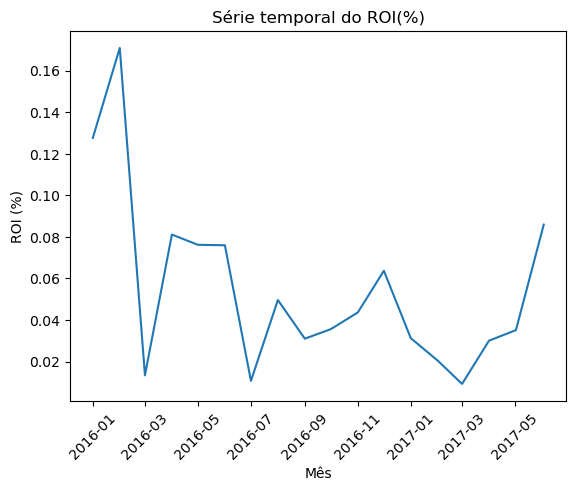

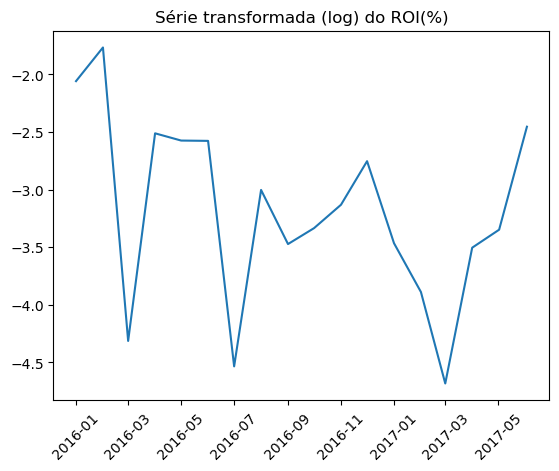

--------------------------------------------------------------------------------


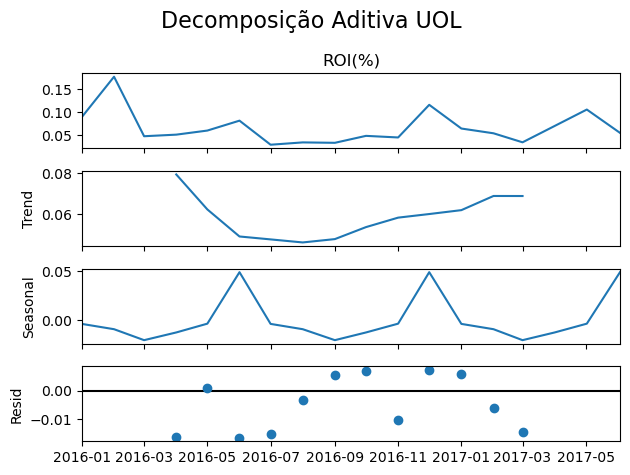

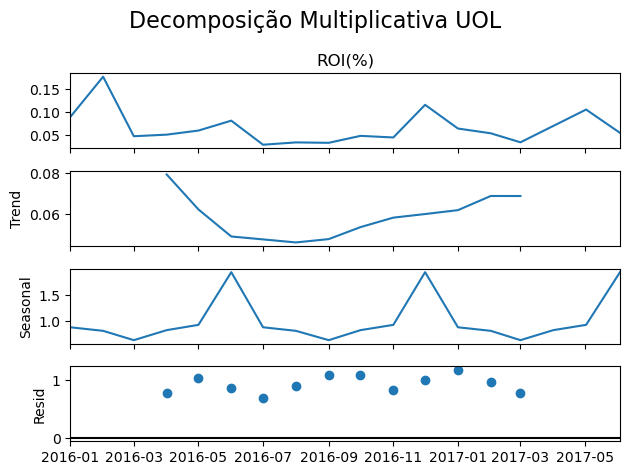

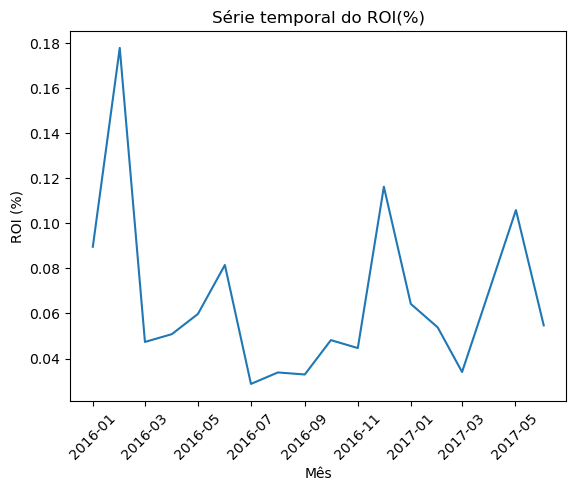

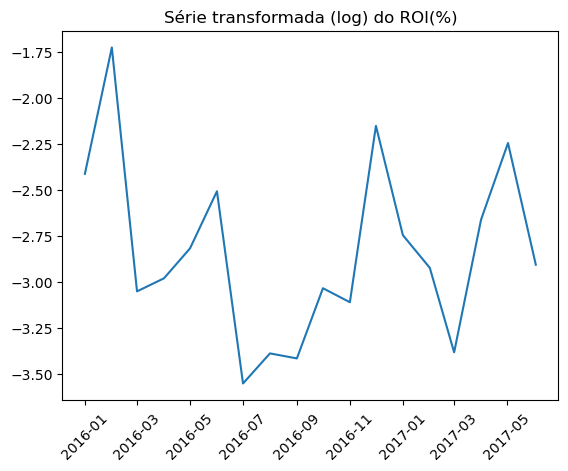

--------------------------------------------------------------------------------


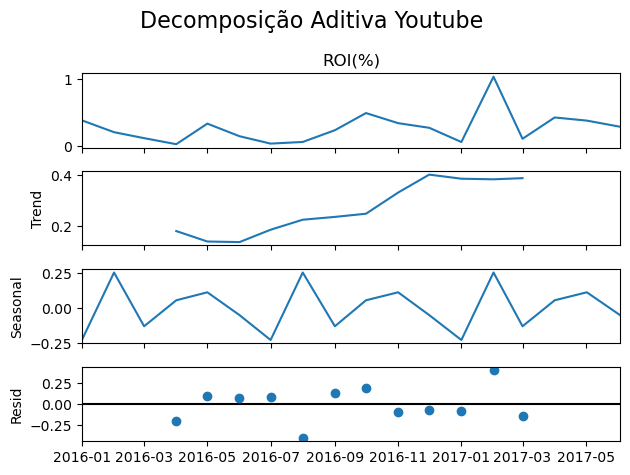

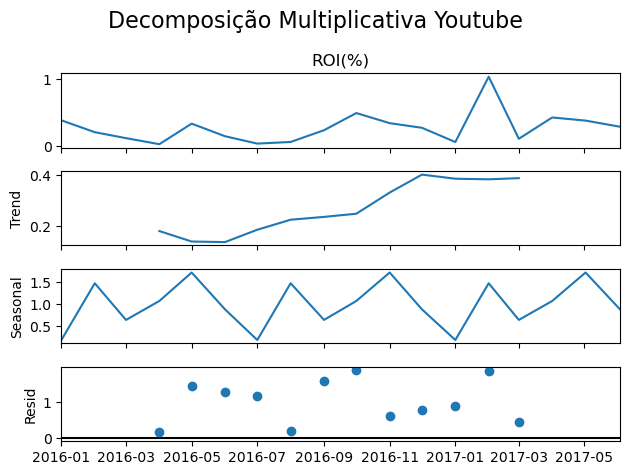

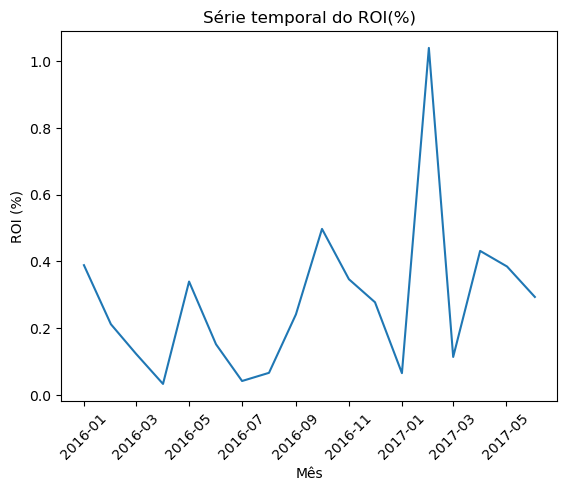

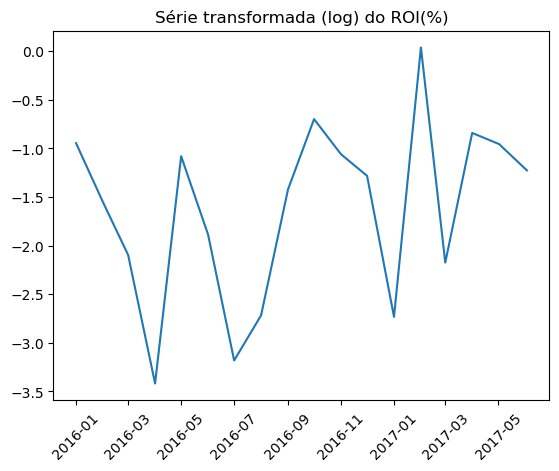

--------------------------------------------------------------------------------


In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
#period=12: espera um padrão anual (ex: dados mensais com sazonalidade anual)
#period=6: pode indicar padrão semestral
#period=4: pode ser usado para trimestres, se fizer sentido no seu caso

for col in lista_coluna_grupo:
    df= df_group.loc[df_group['nameplate']== col].reset_index(drop=True)
    df['ROI(%)'] = (df['leads']/df['investimento'])*100
    # datas em 'Month'
    df = df.sort_values('Month')
    df.set_index('Month', inplace=True)
    
    decomp_add = seasonal_decompose(df['ROI(%)'], model='additive', period=6)
    decomp_add.plot()
    plt.suptitle(f'Decomposição Aditiva {col} ', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Decomposição multiplicativa
    decomp_mult = seasonal_decompose(df['ROI(%)'], model='multiplicative', period=6)
    decomp_mult.plot()
    plt.suptitle(f'Decomposição Multiplicativa {col}', fontsize=16)
    plt.tight_layout()
    plt.show()

    
    
    df['log_ROI'] = np.log(df['ROI(%)'])


    plt.plot(df['ROI(%)'])
    plt.title("Série temporal do ROI(%)")
    plt.xlabel("Mês")
    plt.ylabel("ROI (%)")
    plt.xticks(rotation=45)
    plt.show()
        
    plt.plot(df['log_ROI'])
    plt.title("Série transformada (log) do ROI(%)")
    plt.xticks(rotation=45)
    plt.show()
    
    print('-'*80)

In [40]:
len(df)

18

Se os picos e vales são constantes ao longo do tempo → Aditivo

Se a variação aumenta junto com o valor da série → Multiplicativo



Se a série fica mais estável depois do log, provavelmente o modelo certo é multiplicativo.

Se a série não muda muito, então o modelo aditivo pode bastar.